In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./traffic_violaions.csv')

In [3]:
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       49580 non-null  object 
 4   driver_age_raw      49588 non-null  float64
 5   driver_age          49346 non-null  float64
 6   driver_race         49581 non-null  object 
 7   violation_raw       49581 non-null  object 
 8   violation           49581 non-null  object 
 9   search_conducted    52965 non-null  object 
 10  search_type         2085 non-null   object 
 11  stop_outcome        49581 non-null  object 
 12  is_arrested         49581 non-null  object 
 13  stop_duration       49581 non-null  object 
 14  drugs_related_stop  52965 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.1+ MB


### What factors are associated with a higher likelihood of arrest during traffic stops?

## Handle missing values

In [5]:
df.isna().sum()

stop_date                 0
stop_time                 1
country_name          52966
driver_gender          3386
driver_age_raw         3378
driver_age             3620
driver_race            3385
violation_raw          3385
violation              3385
search_conducted          1
search_type           50881
stop_outcome           3385
is_arrested            3385
stop_duration          3385
drugs_related_stop        1
dtype: int64

In [6]:
df.isna().sum() / len(df) * 100

stop_date               0.000000
stop_time               0.001888
country_name          100.000000
driver_gender           6.392780
driver_age_raw          6.377676
driver_age              6.834573
driver_race             6.390892
violation_raw           6.390892
violation               6.390892
search_conducted        0.001888
search_type            96.063512
stop_outcome            6.390892
is_arrested             6.390892
stop_duration           6.390892
drugs_related_stop      0.001888
dtype: float64

In [7]:
df.drop(columns=['country_name', 'search_type'], inplace=True)


In [8]:
df.dropna(subset=['stop_time', 'search_conducted', 'drugs_related_stop'], inplace=True)


In [9]:
df.isna().sum()


stop_date                0
stop_time                0
driver_gender         3385
driver_age_raw        3377
driver_age            3619
driver_race           3384
violation_raw         3384
violation             3384
search_conducted         0
stop_outcome          3384
is_arrested           3384
stop_duration         3384
drugs_related_stop       0
dtype: int64

In [10]:
df['driver_age_raw'].describe()



count    49588.000000
mean      1965.712229
std        132.195712
min          0.000000
25%       1965.000000
50%       1977.000000
75%       1985.000000
max       8801.000000
Name: driver_age_raw, dtype: float64

In [11]:
df['driver_age_2026'] = 2026 - df['driver_age_raw']


In [12]:
df.describe()

,driver_age_raw,driver_age,driver_age_2026
count,49588.000000,49346.000000,49588.000000
mean,1965.712229,34.171483,60.287771
std,132.195712,12.769907,132.195712
min,0.000000,15.000000,-6775.000000
25%,1965.000000,23.000000,41.000000
50%,1977.000000,31.000000,49.000000
75%,1985.000000,43.000000,61.000000
max,8801.000000,88.000000,2026.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52965 entries, 0 to 52964
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52965 non-null  object 
 1   stop_time           52965 non-null  object 
 2   driver_gender       49580 non-null  object 
 3   driver_age_raw      49588 non-null  float64
 4   driver_age          49346 non-null  float64
 5   driver_race         49581 non-null  object 
 6   violation_raw       49581 non-null  object 
 7   violation           49581 non-null  object 
 8   search_conducted    52965 non-null  object 
 9   stop_outcome        49581 non-null  object 
 10  is_arrested         49581 non-null  object 
 11  stop_duration       49581 non-null  object 
 12  drugs_related_stop  52965 non-null  object 
 13  driver_age_2026     49588 non-null  float64
dtypes: float64(3), object(11)
memory usage: 6.1+ MB


In [14]:
df = df.dropna(subset=[
    'driver_gender',
    'driver_age',
    'driver_race',
    'violation',
    'stop_outcome',
    'is_arrested',
    'stop_duration'
])

In [15]:
df.isna().sum()

stop_date             0
stop_time             0
driver_gender         0
driver_age_raw        0
driver_age            0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
driver_age_2026       0
dtype: int64

In [16]:
df[['violation', 'violation_raw']]

,violation,violation_raw
0,Speeding,Speeding
1,Speeding,Speeding
2,Speeding,Speeding
3,Other,Call for Service
4,Speeding,Speeding
...,...,...
52956,Speeding,Speeding
52958,Speeding,Speeding
52959,Speeding,Speeding
52962,Speeding,Speeding


In [17]:
df = df.drop(columns=['driver_age_raw', 'violation'])


In [18]:
df.isna().sum()
df.shape



(49340, 12)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49340 entries, 0 to 52964
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           49340 non-null  object 
 1   stop_time           49340 non-null  object 
 2   driver_gender       49340 non-null  object 
 3   driver_age          49340 non-null  float64
 4   driver_race         49340 non-null  object 
 5   violation_raw       49340 non-null  object 
 6   search_conducted    49340 non-null  object 
 7   stop_outcome        49340 non-null  object 
 8   is_arrested         49340 non-null  object 
 9   stop_duration       49340 non-null  object 
 10  drugs_related_stop  49340 non-null  object 
 11  driver_age_2026     49340 non-null  float64
dtypes: float64(2), object(10)
memory usage: 4.9+ MB


In [20]:
df.describe()

,driver_age,driver_age_2026
count,49340.000000,49340.000000
mean,34.172254,52.142663
std,12.770223,12.757459
min,15.000000,31.000000
25%,23.000000,41.000000
50%,31.000000,49.000000
75%,43.000000,61.000000
max,88.000000,108.000000


In [21]:
df.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,driver_age_2026
0,1/2/2005,1:55,M,20.0,White,Speeding,False,Citation,False,0-15 Min,False,41.0
1,1/18/2005,8:15,M,40.0,White,Speeding,False,Citation,False,0-15 Min,False,61.0
2,1/23/2005,23:15,M,33.0,White,Speeding,False,Citation,False,0-15 Min,False,54.0
3,2/20/2005,17:15,M,19.0,White,Call for Service,False,Arrest Driver,True,16-30 Min,False,40.0
4,3/14/2005,10:00,F,21.0,White,Speeding,False,Citation,False,0-15 Min,False,42.0


In [22]:
df['stop_date'] = pd.to_datetime(df['stop_date'], format='%m/%d/%Y', errors='coerce')
df['stop_time'] = pd.to_datetime(df['stop_time'], format='%H:%M').dt.time

In [23]:
df['stop_datetime'] = pd.to_datetime(
    df['stop_date'].astype(str) + ' ' + df['stop_time'].astype(str),
    errors='coerce'
)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49340 entries, 0 to 52964
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           49340 non-null  datetime64[ns]
 1   stop_time           49340 non-null  object        
 2   driver_gender       49340 non-null  object        
 3   driver_age          49340 non-null  float64       
 4   driver_race         49340 non-null  object        
 5   violation_raw       49340 non-null  object        
 6   search_conducted    49340 non-null  object        
 7   stop_outcome        49340 non-null  object        
 8   is_arrested         49340 non-null  object        
 9   stop_duration       49340 non-null  object        
 10  drugs_related_stop  49340 non-null  object        
 11  driver_age_2026     49340 non-null  float64       
 12  stop_datetime       49340 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(9)
memory 

In [25]:
df.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,driver_age_2026,stop_datetime
0,2005-01-02,01:55:00,M,20.0,White,Speeding,False,Citation,False,0-15 Min,False,41.0,2005-01-02 01:55:00
1,2005-01-18,08:15:00,M,40.0,White,Speeding,False,Citation,False,0-15 Min,False,61.0,2005-01-18 08:15:00
2,2005-01-23,23:15:00,M,33.0,White,Speeding,False,Citation,False,0-15 Min,False,54.0,2005-01-23 23:15:00
3,2005-02-20,17:15:00,M,19.0,White,Call for Service,False,Arrest Driver,True,16-30 Min,False,40.0,2005-02-20 17:15:00
4,2005-03-14,10:00:00,F,21.0,White,Speeding,False,Citation,False,0-15 Min,False,42.0,2005-03-14 10:00:00


In [26]:
df.drop(columns=['stop_date', 'stop_time'], inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49340 entries, 0 to 52964
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   driver_gender       49340 non-null  object        
 1   driver_age          49340 non-null  float64       
 2   driver_race         49340 non-null  object        
 3   violation_raw       49340 non-null  object        
 4   search_conducted    49340 non-null  object        
 5   stop_outcome        49340 non-null  object        
 6   is_arrested         49340 non-null  object        
 7   stop_duration       49340 non-null  object        
 8   drugs_related_stop  49340 non-null  object        
 9   driver_age_2026     49340 non-null  float64       
 10  stop_datetime       49340 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 4.5+ MB


In [28]:
df['stop_hour'] = df['stop_datetime'].dt.hour
df['stop_weekday'] = df['stop_datetime'].dt.day_name()
df['stop_month'] = df['stop_datetime'].dt.month_name()

In [29]:
df

,driver_gender,driver_age,driver_race,violation_raw,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,driver_age_2026,stop_datetime,stop_hour,stop_weekday,stop_month
0,M,20.0,White,Speeding,False,Citation,False,0-15 Min,False,41.0,2005-01-02 01:55:00,1,Sunday,January
1,M,40.0,White,Speeding,False,Citation,False,0-15 Min,False,61.0,2005-01-18 08:15:00,8,Tuesday,January
2,M,33.0,White,Speeding,False,Citation,False,0-15 Min,False,54.0,2005-01-23 23:15:00,23,Sunday,January
3,M,19.0,White,Call for Service,False,Arrest Driver,True,16-30 Min,False,40.0,2005-02-20 17:15:00,17,Sunday,February
4,F,21.0,White,Speeding,False,Citation,False,0-15 Min,False,42.0,2005-03-14 10:00:00,10,Monday,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52956,M,32.0,White,Speeding,False,Arrest Driver,True,0-15 Min,False,47.0,2011-10-04 22:22:00,22,Tuesday,October
52958,F,44.0,Hispanic,Speeding,False,Citation,False,0-15 Min,False,59.0,2011-10-04 22:36:00,22,Tuesday,October
52959,F,20.0,Black,Speeding,False,Citation,False,0-15 Min,False,35.0,2011-10-04 23:25:00,23,Tuesday,October
52962,M,25.0,White,Speeding,False,Citation,False,0-15 Min,False,40.0,2011-10-05 06:43:00,6,Wednesday,October


In [30]:
def get_period(hour):
    if 0 <= hour < 5:
        return 'Night'
    elif 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    else:
        return 'Evening'

df['period'] = df['stop_hour'].apply(get_period)


In [31]:
df

,driver_gender,driver_age,driver_race,violation_raw,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,driver_age_2026,stop_datetime,stop_hour,stop_weekday,stop_month,period
0,M,20.0,White,Speeding,False,Citation,False,0-15 Min,False,41.0,2005-01-02 01:55:00,1,Sunday,January,Night
1,M,40.0,White,Speeding,False,Citation,False,0-15 Min,False,61.0,2005-01-18 08:15:00,8,Tuesday,January,Morning
2,M,33.0,White,Speeding,False,Citation,False,0-15 Min,False,54.0,2005-01-23 23:15:00,23,Sunday,January,Evening
3,M,19.0,White,Call for Service,False,Arrest Driver,True,16-30 Min,False,40.0,2005-02-20 17:15:00,17,Sunday,February,Evening
4,F,21.0,White,Speeding,False,Citation,False,0-15 Min,False,42.0,2005-03-14 10:00:00,10,Monday,March,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52956,M,32.0,White,Speeding,False,Arrest Driver,True,0-15 Min,False,47.0,2011-10-04 22:22:00,22,Tuesday,October,Evening
52958,F,44.0,Hispanic,Speeding,False,Citation,False,0-15 Min,False,59.0,2011-10-04 22:36:00,22,Tuesday,October,Evening
52959,F,20.0,Black,Speeding,False,Citation,False,0-15 Min,False,35.0,2011-10-04 23:25:00,23,Tuesday,October,Evening
52962,M,25.0,White,Speeding,False,Citation,False,0-15 Min,False,40.0,2011-10-05 06:43:00,6,Wednesday,October,Morning


In [32]:
for col in ['search_conducted', 'is_arrested', 'drugs_related_stop']:
    print(col, df[col].unique())


search_conducted [False True]
is_arrested [False True]
drugs_related_stop [False True]


In [33]:
bool_map = {
    'True': True,
    'False': False,
    True: True,
    False: False
}

bool_cols = ['search_conducted', 'is_arrested', 'drugs_related_stop']

for col in bool_cols:
    df[col] = df[col].map(bool_map)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49340 entries, 0 to 52964
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   driver_gender       49340 non-null  object        
 1   driver_age          49340 non-null  float64       
 2   driver_race         49340 non-null  object        
 3   violation_raw       49340 non-null  object        
 4   search_conducted    49340 non-null  bool          
 5   stop_outcome        49340 non-null  object        
 6   is_arrested         49340 non-null  bool          
 7   stop_duration       49340 non-null  object        
 8   drugs_related_stop  49340 non-null  bool          
 9   driver_age_2026     49340 non-null  float64       
 10  stop_datetime       49340 non-null  datetime64[ns]
 11  stop_hour           49340 non-null  int32         
 12  stop_weekday        49340 non-null  object        
 13  stop_month          49340 non-null  object        


In [35]:
df['stop_duration'].unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

In [36]:
df.nunique()

driver_gender             2
driver_age               72
driver_race               5
violation_raw            11
search_conducted          2
stop_outcome              6
is_arrested               2
stop_duration             3
drugs_related_stop        2
driver_age_2026          75
stop_datetime         47883
stop_hour                24
stop_weekday              7
stop_month               12
period                    4
dtype: int64

In [37]:
df.to_csv('cleaned_traffic_violations.csv', index=False)

C:\Users\ibrah\AppData\Local\Temp\ipykernel_23652\4065693821.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


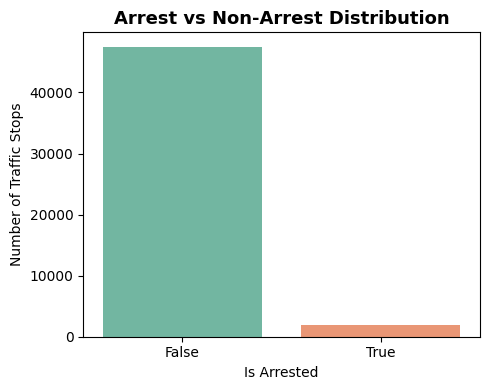

In [38]:
plt.figure(figsize=(5, 4))

sns.countplot(
    x='is_arrested',
    data=df,
    palette='Set2'
)

plt.title('Arrest vs Non-Arrest Distribution', fontsize=13, weight='bold')
plt.xlabel('Is Arrested')
plt.ylabel('Number of Traffic Stops')

plt.tight_layout()
plt.show()



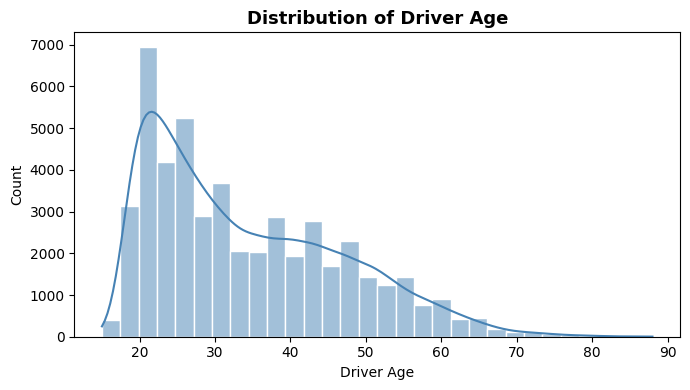

In [39]:
plt.figure(figsize=(7, 4))

sns.histplot(
    df['driver_age'],
    bins=30,
    kde=True,
    color='steelblue',
    edgecolor='white'
)

plt.title('Distribution of Driver Age', fontsize=13, weight='bold')
plt.xlabel('Driver Age')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


C:\Users\ibrah\AppData\Local\Temp\ipykernel_23652\3184939520.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


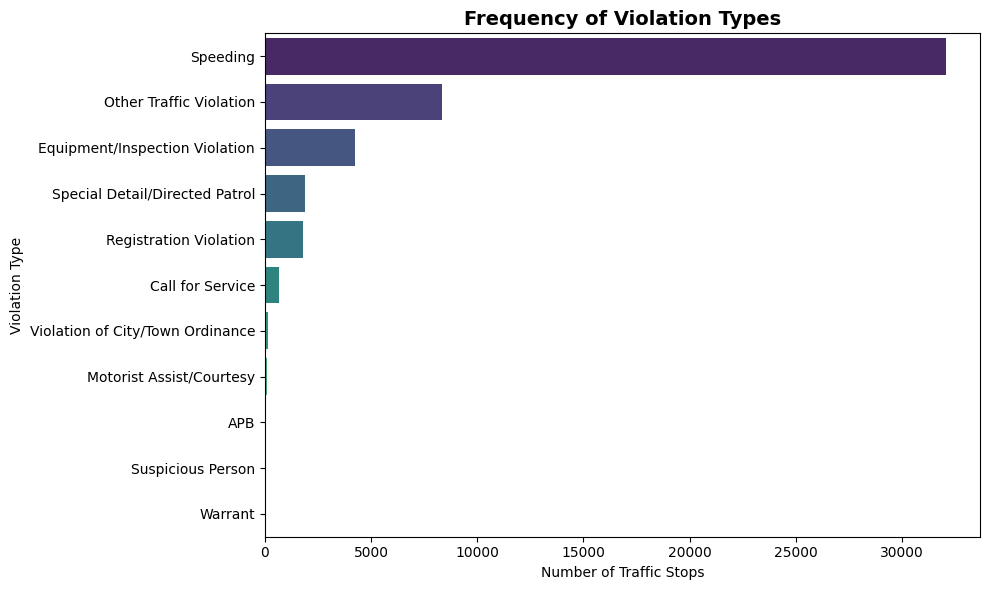

In [40]:
plt.figure(figsize=(10, 6))

sns.countplot(
    y='violation_raw',
    data=df,
    order=df['violation_raw'].value_counts().index,
    palette='viridis'
)

plt.title('Frequency of Violation Types', fontsize=14, weight='bold')
plt.xlabel('Number of Traffic Stops')
plt.ylabel('Violation Type')

plt.tight_layout()
plt.show()


C:\Users\ibrah\AppData\Local\Temp\ipykernel_23652\4250164208.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


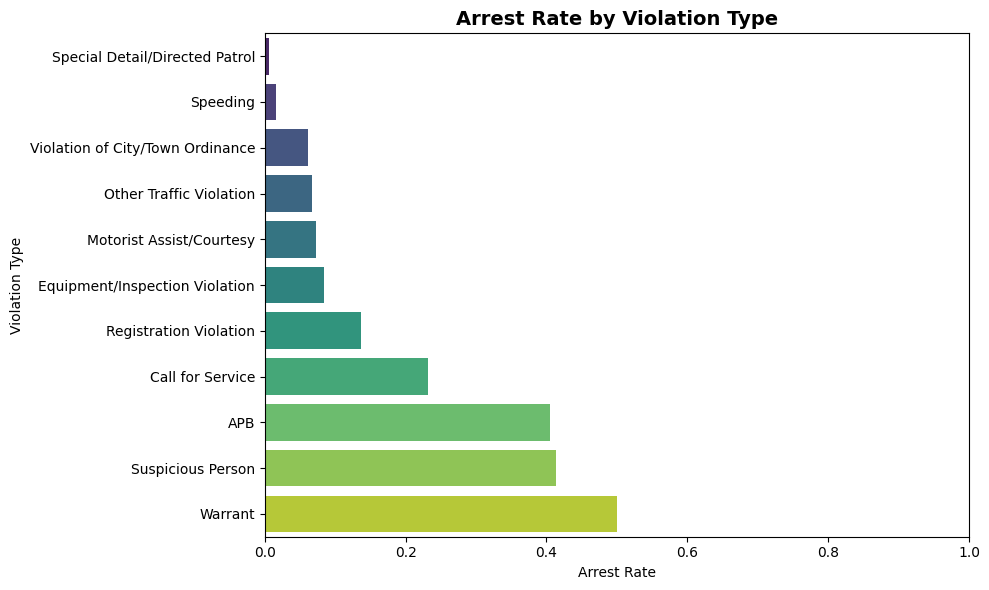

In [41]:
# Prepare data (sorted)
violation_arrest = (
    df.groupby('violation_raw')['is_arrested']
      .mean()
      .reset_index()
      .sort_values('is_arrested', ascending=True)
)

plt.figure(figsize=(10, 6))

sns.barplot(
    x='is_arrested',
    y='violation_raw',
    data=violation_arrest,
    palette='viridis'
)

plt.title('Arrest Rate by Violation Type', fontsize=14, weight='bold')
plt.xlabel('Arrest Rate')
plt.ylabel('Violation Type')

plt.xlim(0, 1)
plt.tight_layout()
plt.show()


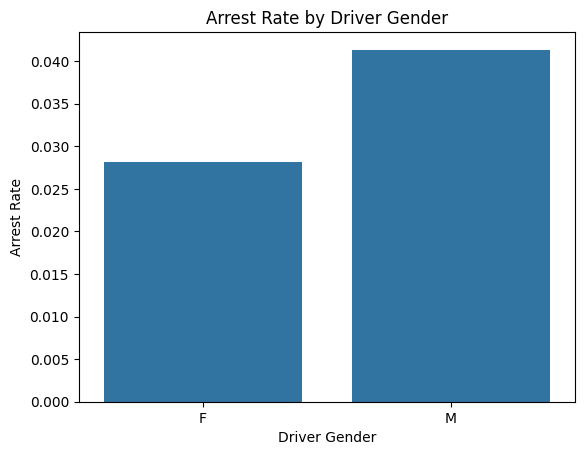

In [42]:
gender_arrest = (
    df.groupby('driver_gender')['is_arrested']
      .mean()
      .reset_index()
)

sns.barplot(
    x='driver_gender',
    y='is_arrested',
    data=gender_arrest
)
plt.title('Arrest Rate by Driver Gender')
plt.ylabel('Arrest Rate')
plt.xlabel('Driver Gender')
plt.show()


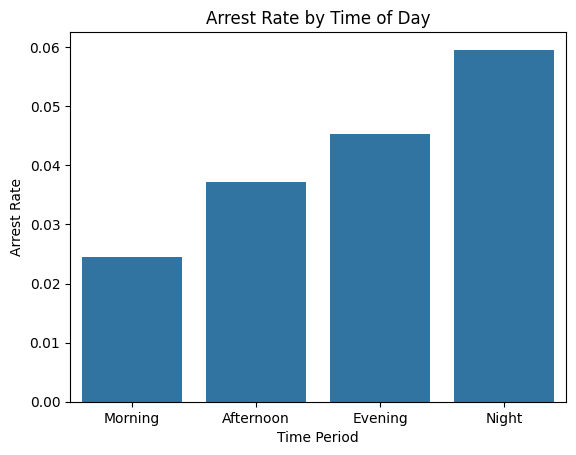

In [43]:
period_arrest = (
    df.groupby('period')['is_arrested']
      .mean()
      .reset_index()
)

sns.barplot(
    x='period',
    y='is_arrested',
    data=period_arrest,
    order=['Morning', 'Afternoon', 'Evening', 'Night']
)
plt.title('Arrest Rate by Time of Day')
plt.ylabel('Arrest Rate')
plt.xlabel('Time Period')
plt.show()


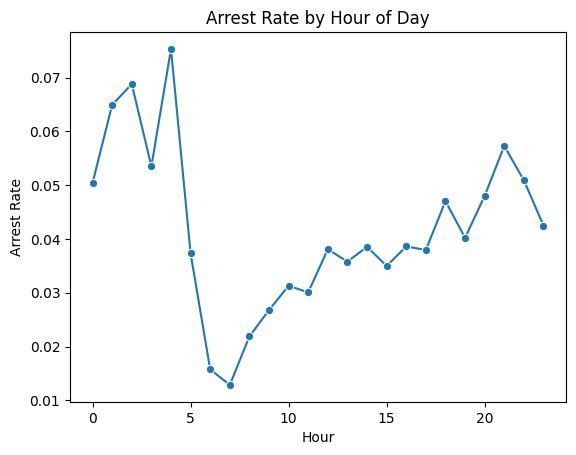

In [44]:
hourly_arrest = (
    df.groupby('stop_hour')['is_arrested']
      .mean()
      .reset_index()
)

sns.lineplot(
    x='stop_hour',
    y='is_arrested',
    data=hourly_arrest,
    marker='o'
)
plt.title('Arrest Rate by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.show()


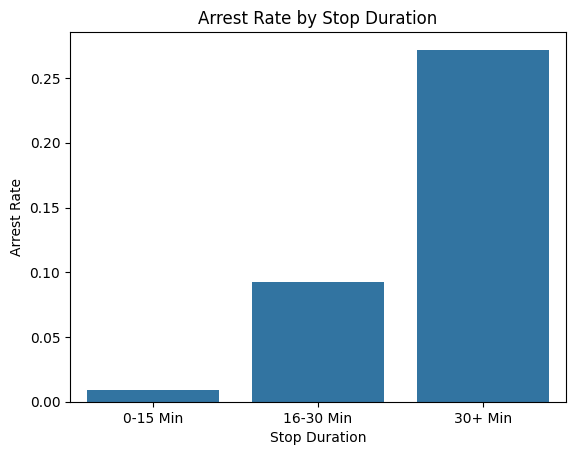

In [45]:
duration_arrest = (
    df.groupby('stop_duration')['is_arrested']
      .mean()
      .reset_index()
)

sns.barplot(
    x='stop_duration',
    y='is_arrested',
    data=duration_arrest
)
plt.title('Arrest Rate by Stop Duration')
plt.xlabel('Stop Duration')
plt.ylabel('Arrest Rate')
plt.show()


C:\Users\ibrah\AppData\Local\Temp\ipykernel_23652\4176555774.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


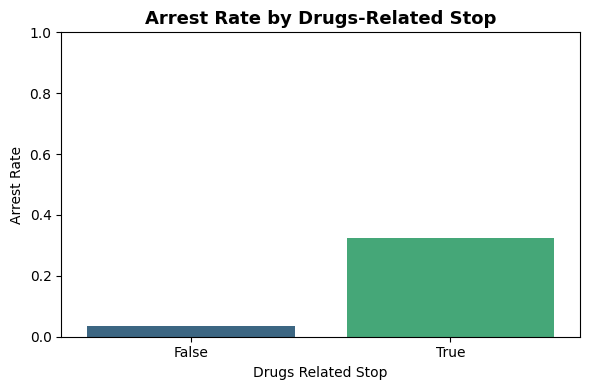

In [46]:
drugs_arrest = (
    df.groupby('drugs_related_stop')['is_arrested']
      .mean()
      .reset_index()
)

plt.figure(figsize=(6, 4))
sns.barplot(
    x='drugs_related_stop',
    y='is_arrested',
    data=drugs_arrest,
    palette='viridis'
)

plt.title('Arrest Rate by Drugs-Related Stop', fontsize=13, weight='bold')
plt.xlabel('Drugs Related Stop')
plt.ylabel('Arrest Rate')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


C:\Users\ibrah\AppData\Local\Temp\ipykernel_23652\2565619545.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


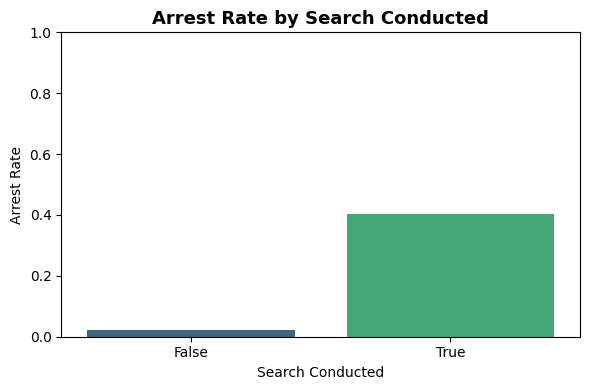

In [47]:
search_arrest = (
    df.groupby('search_conducted')['is_arrested']
      .mean()
      .reset_index()
)

plt.figure(figsize=(6, 4))
sns.barplot(
    x='search_conducted',
    y='is_arrested',
    data=search_arrest,
    palette='viridis'
)

plt.title('Arrest Rate by Search Conducted', fontsize=13, weight='bold')
plt.xlabel('Search Conducted')
plt.ylabel('Arrest Rate')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


C:\Users\ibrah\AppData\Local\Temp\ipykernel_23652\351863208.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


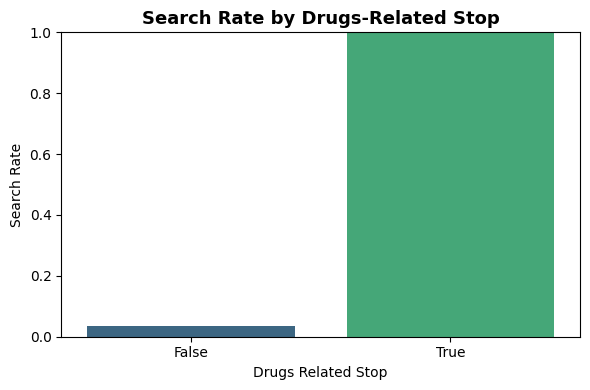

In [48]:
drug_search_rate = (
    df.groupby('drugs_related_stop')['search_conducted']
      .mean()
      .reset_index()
)

plt.figure(figsize=(6, 4))
sns.barplot(
    x='drugs_related_stop',
    y='search_conducted',
    data=drug_search_rate,
    palette='viridis'
)

plt.title('Search Rate by Drugs-Related Stop', fontsize=13, weight='bold')
plt.xlabel('Drugs Related Stop')
plt.ylabel('Search Rate')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


C:\Users\ibrah\AppData\Local\Temp\ipykernel_23652\1582066922.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


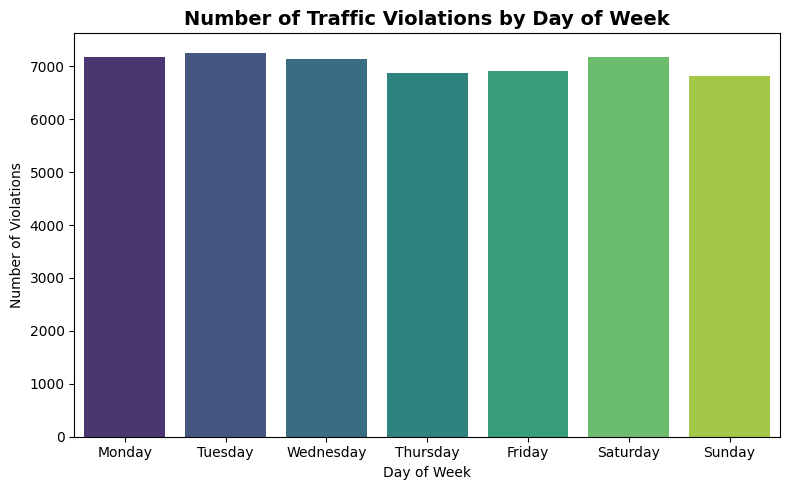

In [49]:
day_order = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]

plt.figure(figsize=(8, 5))

sns.countplot(
    x='stop_weekday',
    data=df,
    order=day_order,
    palette='viridis'
)

plt.title('Number of Traffic Violations by Day of Week', fontsize=14, weight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Number of Violations')

plt.tight_layout()
plt.show()


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49340 entries, 0 to 52964
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   driver_gender       49340 non-null  object        
 1   driver_age          49340 non-null  float64       
 2   driver_race         49340 non-null  object        
 3   violation_raw       49340 non-null  object        
 4   search_conducted    49340 non-null  bool          
 5   stop_outcome        49340 non-null  object        
 6   is_arrested         49340 non-null  bool          
 7   stop_duration       49340 non-null  object        
 8   drugs_related_stop  49340 non-null  bool          
 9   driver_age_2026     49340 non-null  float64       
 10  stop_datetime       49340 non-null  datetime64[ns]
 11  stop_hour           49340 non-null  int32         
 12  stop_weekday        49340 non-null  object        
 13  stop_month          49340 non-null  object        


In [51]:
duration_map = {'0-15 Min': 1, '16-30 Min': 2, '30+ Min': 3}
df['stop_duration_enc'] = df['stop_duration'].map(duration_map)

cat_cols = ['driver_gender', 'driver_race', 'violation_raw', 'stop_outcome', 'period', 'stop_weekday']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

df_encoded.head()
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49340 entries, 0 to 52964
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   driver_age                                      49340 non-null  float64       
 1   search_conducted                                49340 non-null  bool          
 2   is_arrested                                     49340 non-null  bool          
 3   stop_duration                                   49340 non-null  object        
 4   drugs_related_stop                              49340 non-null  bool          
 5   driver_age_2026                                 49340 non-null  float64       
 6   stop_datetime                                   49340 non-null  datetime64[ns]
 7   stop_hour                                       49340 non-null  int32         
 8   stop_month                                      493

In [52]:
df.describe()

,driver_age,driver_age_2026,stop_datetime,stop_hour,stop_duration_enc
count,49340.000000,49340.000000,49340,49340.000000,49340.000000
mean,34.172254,52.142663,2008-07-09 05:43:38.272801024,11.600243,1.291305
min,15.000000,31.000000,2005-01-02 01:55:00,0.000000,1.000000
25%,23.000000,41.000000,2006-12-20 01:14:15,8.000000,1.000000
50%,31.000000,49.000000,2008-05-26 16:39:00,11.000000,1.000000
75%,43.000000,61.000000,2010-01-13 10:50:45,16.000000,1.000000
max,88.000000,108.000000,2011-10-05 07:19:00,23.000000,3.000000
std,12.770223,12.757459,NaN,6.511954,0.547396


In [53]:
from datasist.structdata import detect_outliers

outliers_age = detect_outliers(
    df,
    1.5,
    ['driver_age', 'stop_hour']
)

len(outliers_age)



0

In [54]:
# df_encoded.to_csv('cleaned_traffic_violations.csv', index=False)


In [55]:
df_encoded.head()

,driver_age,search_conducted,is_arrested,stop_duration,drugs_related_stop,driver_age_2026,stop_datetime,stop_hour,stop_month,stop_duration_enc,...,stop_outcome_Warning,period_Evening,period_Morning,period_Night,stop_weekday_Monday,stop_weekday_Saturday,stop_weekday_Sunday,stop_weekday_Thursday,stop_weekday_Tuesday,stop_weekday_Wednesday
0,20.0,False,False,0-15 Min,False,41.0,2005-01-02 01:55:00,1,January,1,...,False,False,False,True,False,False,True,False,False,False
1,40.0,False,False,0-15 Min,False,61.0,2005-01-18 08:15:00,8,January,1,...,False,False,True,False,False,False,False,False,True,False
2,33.0,False,False,0-15 Min,False,54.0,2005-01-23 23:15:00,23,January,1,...,False,True,False,False,False,False,True,False,False,False
3,19.0,False,True,16-30 Min,False,40.0,2005-02-20 17:15:00,17,February,2,...,False,True,False,False,False,False,True,False,False,False
4,21.0,False,False,0-15 Min,False,42.0,2005-03-14 10:00:00,10,March,1,...,False,False,True,False,True,False,False,False,False,False


In [58]:
top = (
            df.groupby("violation_raw")["is_arrested"]
            .mean()
            .sort_values(ascending=False)
        )

In [59]:
top

violation_raw
Warrant                             0.500000
Suspicious Person                   0.413793
APB                                 0.404762
Call for Service                    0.231231
Registration Violation              0.136489
Equipment/Inspection Violation      0.084797
Motorist Assist/Courtesy            0.073394
Other Traffic Violation             0.066579
Violation of City/Town Ordinance    0.061069
Speeding                            0.015253
Special Detail/Directed Patrol      0.005345
Name: is_arrested, dtype: float64

In [60]:
plot_df = (
            df.groupby("violation_raw")
            .agg(
                arrest_rate=("is_arrested", "mean"),
                total_stops=("is_arrested", "count"),
                arrests=("is_arrested", "sum"),
            )
            .reset_index()
            .sort_values("arrest_rate", ascending=False)
        )

In [61]:
plot_df

,violation_raw,arrest_rate,total_stops,arrests
10,Warrant,0.500000,10,5
8,Suspicious Person,0.413793,29,12
0,APB,0.404762,42,17
1,Call for Service,0.231231,666,154
5,Registration Violation,0.136489,1817,248
2,Equipment/Inspection Violation,0.084797,4269,362
3,Motorist Assist/Courtesy,0.073394,109,8
4,Other Traffic Violation,0.066579,8336,555
9,Violation of City/Town Ordinance,0.061069,131,8
7,Speeding,0.015253,32060,489
